In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mc
import matplotlib.cm as cm
from random import randint

### クエリ作成

In [100]:
from math import sqrt


N, Q = 100, 200 # 区間幅, クエリ数
line = []
# ランダムにクエリを作成
for i in range(Q):
    l = randint(1, N)
    r = randint(l, N)
    line.append((i, l, r))

print("クエリ数：", len(line))
print("ソート前")
print(*line[:10], sep="\n")

クエリ数： 200
ソート前
(0, 69, 94)
(1, 67, 84)
(2, 46, 52)
(3, 87, 98)
(4, 69, 88)
(5, 17, 41)
(6, 99, 99)
(7, 55, 80)
(8, 53, 82)
(9, 100, 100)


### ソート前のクエリを描画

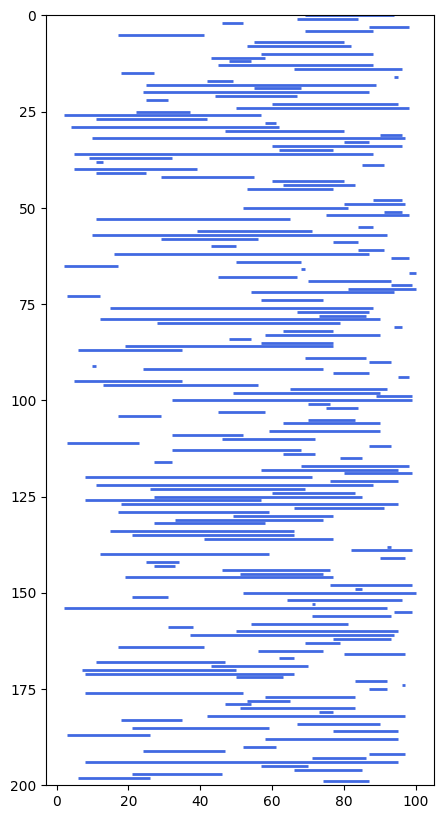

In [101]:
lines = [[(line[i][1], i), (line[i][2], i)] for i in range(Q)]
lc = mc.LineCollection(lines, colors="#4169e1", linewidths=2)

fig = plt.figure(figsize=(5, 10))
ax = fig.add_subplot()
ax.add_collection(lc)
ax.autoscale()
ax.set_ylim([Q, 0])
plt.show()

### ソート後のクエリを描画

ソート後
(26, 2, 57)
(65, 2, 17)
(154, 2, 92)
(73, 3, 12)
(111, 3, 23)
(187, 3, 26)
(29, 4, 62)
(36, 5, 88)
(40, 5, 39)
(95, 5, 35)


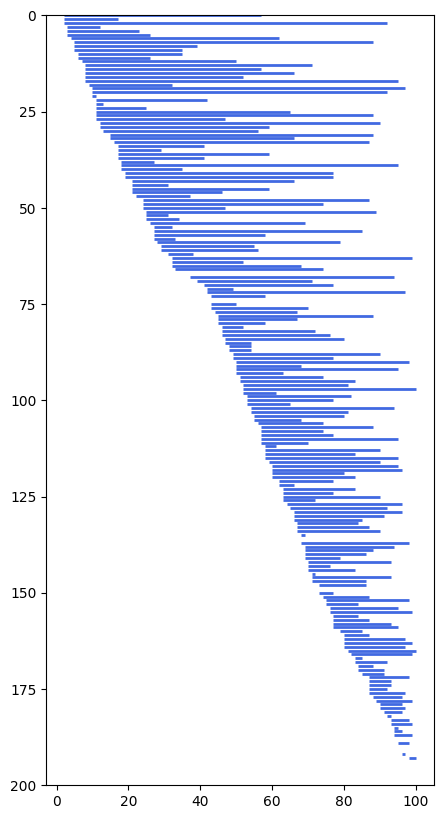

In [102]:
# L を元にソートする
line.sort(key=lambda x: x[1])

print("ソート後")
print(*line[:10], sep="\n")

lines = [[(line[i][1], i), (line[i][2], i)] for i in range(Q)]
lc = mc.LineCollection(lines, colors="#4169e1", linewidths=2)

fig = plt.figure(figsize=(5, 10))
ax = fig.add_subplot()
ax.add_collection(lc)
ax.autoscale()
ax.set_ylim([Q, 0])
plt.show()

In [103]:
# ブロックを定義する（N を √Q 分割する）
block = int(N / Q**0.5) + 1
print("ブロックサイズ：", block)

ブロックサイズ： 8


In [104]:
# クエリを √Q 個のブロックに振り分ける
queries = [[] for _ in range(int(Q**0.5) + 1)]
print("ブロック：")
print(queries)

for i, l, r in line:
    queries[l // block].append((i, l, r))

ブロック：
[[], [], [], [], [], [], [], [], [], [], [], [], [], [], []]


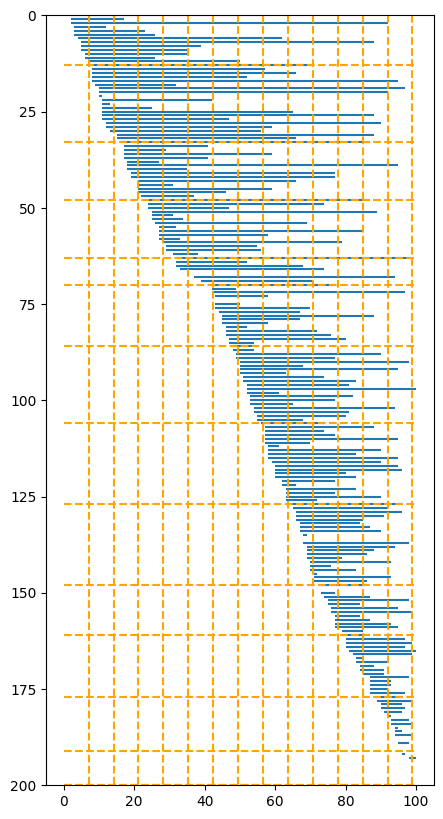

In [105]:
fig = plt.figure(figsize=(5, 10))

ax = fig.add_subplot()
ind = 0
for i in range(len(queries)):
    for j in range(len(queries[i])):
        plt.hlines(ind, queries[i][j][1], queries[i][j][2])
        ind += 1

ax.set_ylim([Q, 0])
# 縦線
for i in range(1, int(sqrt(Q)) + 1):
    plt.vlines(i * N / sqrt(Q), 0, Q, linestyles="dashed", colors="orange")
# 横線
num = 0
for i in range(len(queries)):
    num += len(queries[i])
    plt.hlines(num, 0, N, linestyles="dashed", colors="orange")

plt.show()

In [106]:
# R でソートする
for i in range(len(queries)):
    queries[i].sort(key=lambda x: x[2], reverse=i%2)

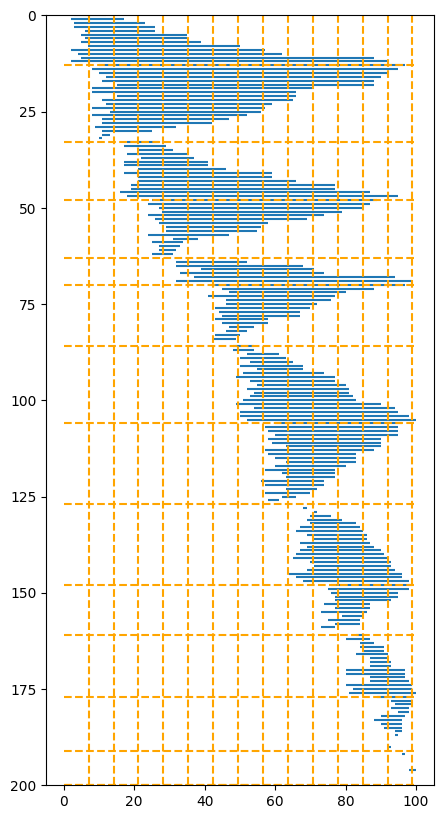

In [107]:
fig = plt.figure(figsize=(5, 10))

ax = fig.add_subplot()
ind = 0
for i in range(len(queries)):
    for j in range(len(queries[i])):
        plt.hlines(ind, queries[i][j][1], queries[i][j][2])
        ind += 1

ax.set_ylim([Q, 0])

# 縦線
for i in range(1, int(sqrt(Q)) + 1):
    plt.vlines(i * N / sqrt(Q), 0, Q, linestyles="dashed", colors="orange")
# 横線
num = 0
for i in range(len(queries)):
    num += len(queries[i])
    plt.hlines(num, 0, N, linestyles="dashed", colors="orange")

plt.show()